In [1]:
import numpy as np
import tensorflow
from tensorflow import keras
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [38]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

(50000, 32, 32, 3)


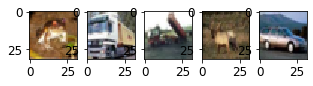

In [39]:
print(X_train.shape)
for n in range(5):
    plt.subplot(1, 6, n+1)
    plt.imshow(X_train[n],interpolation="nearest")
plt.show()

## a. 20 Hidden Layers of 100 Neurons with He Initialization and ELU activation func

In [33]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))

n_layers = 20
n_neurons = 100
for l in range(n_layers):
    model.add(keras.layers.Dense(n_neurons, activation='elu', kernel_initializer='he_normal'))

model.add(keras.layers.Dense(10, activation='softmax'))

## b. train with Nadam Optimization and Early Stopping

In [4]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("cifar10_model.h5", save_best_only=True)


tb_path = r'C:\Users\lu.jin01\OneDrive - Cardinal Health\2.Jpt_code\TB_logs'
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(tb_path, "cifar10", "run_{:03d}".format(run_index))

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [39]:
optimizer = keras.optimizers.Nadam(lr=5e-5)

model.compile(loss='sparse_categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])

In [43]:
model.fit(X_train, y_train, epochs=100, validation_split=0.1, callbacks=callbacks)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 28s 621us/sample - loss: 8.4760 - accuracy: 0.1402 - val_loss: 2.3277 - val_accuracy: 0.1618
Epoch 2/100
45000/45000 [==============================] - 21s 467us/sample - loss: 2.1560 - accuracy: 0.2189 - val_loss: 2.1512 - val_accuracy: 0.2136
Epoch 3/100
45000/45000 [==============================] - 19s 429us/sample - loss: 2.0118 - accuracy: 0.2662 - val_loss: 2.0808 - val_accuracy: 0.2592
Epoch 4/100
45000/45000 [==============================] - 19s 418us/sample - loss: 1.9178 - accuracy: 0.3049 - val_loss: 2.0183 - val_accuracy: 0.2682
Epoch 5/100
45000/45000 [==============================] - 19s 431us/sample - loss: 1.8459 - accuracy: 0.3305 - val_loss: 1.8832 - val_accuracy: 0.3110
Epoch 6/100
45000/45000 [==============================] - 22s 481us/sample - loss: 1.7946 - accuracy: 0.3504 - val_loss: 1.8326 - val_accuracy: 0.3422
Epoch 7/100
45000/45000 [==============

In [44]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 122us/sample - loss: 1.6096 - accuracy: 0.4579


[1.609637471961975, 0.4579]

In [55]:
# %load_ext tensorboard
tb_loc = os.path.join(tb_path, "cifar10")
%tensorboard --logdir="C:/Users/lu.jin01/OneDrive - Cardinal Health/2.Jpt_code/TB_logs/cifar10"
# %tensorboard --logdir tb_loc

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 24472.

In [37]:
model = keras.models.load_model("my_cifar10_model.h5")
early_stopping_cb.stopped_epoch

0

## c. Add Batch Normalization and compare Converging Speed and Model Accuracy

In [221]:
keras.backend.clear_session()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))

n_layers = 20
n_neurons = 100
for l in range(n_layers):
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(n_neurons, activation='elu', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation='softmax'))

In [222]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("cifar10_tb_model.h5", save_best_only=True)


tb_path = r'C:\Users\lu.jin01\OneDrive - Cardinal Health\2.Jpt_code\TB_logs'
run_index = 2 # increment every time you train the model
run_logdir = os.path.join(tb_path, "cifar10", "run_{:03d}".format(run_index))

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [223]:
# optimizer = keras.optimizers.Nadam(lr=5e-5)
optimizer = keras.optimizers.Nadam(lr=5e-4)

model.compile(loss='sparse_categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])

In [224]:
model.fit(X_train, y_train, epochs=100, validation_split=0.1, callbacks=callbacks)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 59s 1ms/sample - loss: 1.9181 - accuracy: 0.3133 - val_loss: 1.7090 - val_accuracy: 0.3808
Epoch 2/100
45000/45000 [==============================] - 40s 879us/sample - loss: 1.7164 - accuracy: 0.3881 - val_loss: 1.6268 - val_accuracy: 0.4232
Epoch 3/100
45000/45000 [==============================] - 40s 879us/sample - loss: 1.6437 - accuracy: 0.4158 - val_loss: 1.5595 - val_accuracy: 0.4412
Epoch 4/100
45000/45000 [==============================] - 39s 872us/sample - loss: 1.5888 - accuracy: 0.4366 - val_loss: 1.5060 - val_accuracy: 0.4678
Epoch 5/100
45000/45000 [==============================] - 40s 881us/sample - loss: 1.5459 - accuracy: 0.4520 - val_loss: 1.4943 - val_accuracy: 0.4716
Epoch 6/100
45000/45000 [==============================] - 40s 898us/sample - loss: 1.5109 - accuracy: 0.4638 - val_loss: 1.4618 - val_accuracy: 0.4782
Epoch 7/100
45000/45000 [================

In [48]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 173us/sample - loss: 1.4175 - accuracy: 0.5163


[1.417516872215271, 0.5163]

##### Conclusion: longer training time per epoch, but fewer epochs

## d. Use SELU to replace ELU+Batch_Normalization

##### build a neural network composed exclusively of a stack of dense layers, and if all hidden layers use the SELU activation function, 
then the network will self-normalize: the output of each layer will tend to preserve a mean of 0 and standard deviation of 1 during training,<br/>
which solves the vanishing/exploding gradients problem

In [57]:
keras.backend.clear_session()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))

n_layers = 20
n_neurons = 100
for l in range(n_layers):
    model.add(keras.layers.Dense(n_neurons, activation='selu', kernel_initializer='lecun_normal'))

model.add(keras.layers.Dense(10, activation='softmax'))

optimizer = keras.optimizers.Nadam(lr=5e-5)

model.compile(loss='sparse_categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("cifar10_selu_model.h5", save_best_only=True)

tb_path = r'C:\Users\lu.jin01\OneDrive - Cardinal Health\2.Jpt_code\TB_logs'
run_index = 3 # increment every time you train the model
run_logdir = os.path.join(tb_path, "cifar10", "run_{:03d}".format(run_index))

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

##### Need to standardardize input data

In [58]:
avg = X_train.mean()
std = X_train.std()
X_train_scaled = (X_train - avg)/std

In [59]:
model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.1, callbacks=callbacks)

X_test_scaled = (X_test - avg)/std
model.evaluate(X_test_scaled, y_test)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 33s 740us/sample - loss: 1.8621 - accuracy: 0.3376 - val_loss: 1.7545 - val_accuracy: 0.3706
Epoch 2/100
45000/45000 [==============================] - 22s 479us/sample - loss: 1.6466 - accuracy: 0.4145 - val_loss: 1.6347 - val_accuracy: 0.4070
Epoch 3/100
45000/45000 [==============================] - 22s 478us/sample - loss: 1.5525 - accuracy: 0.4492 - val_loss: 1.5943 - val_accuracy: 0.4368
Epoch 4/100
45000/45000 [==============================] - 25s 549us/sample - loss: 1.4843 - accuracy: 0.4722 - val_loss: 1.5519 - val_accuracy: 0.4540
Epoch 5/100
45000/45000 [==============================] - 22s 490us/sample - loss: 1.4272 - accuracy: 0.4914 - val_loss: 1.5280 - val_accuracy: 0.4612
Epoch 6/100
45000/45000 [==============================] - 22s 498us/sample - loss: 1.3730 - accuracy: 0.5149 - val_loss: 1.4919 - val_accuracy: 0.4708
Epoch 7/100
45000/45000 [==============

[1.885440619277954, 0.4785]

##### Conclusion: About same training time per Epoch as ELU, but fewer epochs

## e. Regularize with alpha dropout, then use MC Dropout without retraing the model

<link rel="stylesheet" href="styles.css">

In [61]:
keras.backend.clear_session()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))

n_layers = 20
n_neurons = 100
for l in range(n_layers):
    model.add(keras.layers.Dense(n_neurons, activation='selu', kernel_initializer='lecun_normal'))
# add a alpha dropout layer right before the output
model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation='softmax'))

optimizer = keras.optimizers.Nadam(lr=5e-5)

model.compile(loss='sparse_categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("cifar10_AlphaDropout_model.h5", save_best_only=True)

tb_path = r'C:\Users\lu.jin01\OneDrive - Cardinal Health\2.Jpt_code\TB_logs'
run_index = 4 # increment every time you train the model
run_logdir = os.path.join(tb_path, "cifar10", "run_{:03d}".format(run_index))

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [62]:
model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.1, callbacks=callbacks)

model.evaluate(X_test_scaled, y_test)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 33s 734us/sample - loss: 2.0258 - accuracy: 0.2910 - val_loss: 1.7752 - val_accuracy: 0.3830
Epoch 2/100
45000/45000 [==============================] - 26s 575us/sample - loss: 1.7315 - accuracy: 0.3889 - val_loss: 1.6518 - val_accuracy: 0.4270
Epoch 3/100
45000/45000 [==============================] - 22s 478us/sample - loss: 1.5959 - accuracy: 0.4357 - val_loss: 1.5864 - val_accuracy: 0.4520
Epoch 4/100
45000/45000 [==============================] - 21s 460us/sample - loss: 1.5099 - accuracy: 0.4641 - val_loss: 1.5658 - val_accuracy: 0.4662
Epoch 5/100
45000/45000 [==============================] - 26s 588us/sample - loss: 1.4416 - accuracy: 0.4871 - val_loss: 1.5284 - val_accuracy: 0.4708
Epoch 6/100
45000/45000 [==============================] - 23s 521us/sample - loss: 1.3871 - accuracy: 0.5066 - val_loss: 1.5450 - val_accuracy: 0.4722
Epoch 7/100
45000/45000 [==============

[2.005557848930359, 0.4879]

#### Alpha Dropout Conclusion: 2 fewer Epochs, and sligher better accuracy than the none regularized version

#### 1 Try Monte Carlo Dropout the easy way

In [139]:
tf.random.set_seed(0)
np.random.seed(0)
y_probas = np.stack([model(X_test_scaled, training=True) for sample in range(100)])
y_prob = y_probas.mean(axis=0)

In [140]:
np.round(y_probas.std(0)[:1],2)

array([[0.01, 0.  , 0.01, 0.08, 0.04, 0.02, 0.01, 0.  , 0.05, 0.01]],
      dtype=float32)

In [141]:
y_pred = np.argmax(y_prob, axis=1).reshape(-1,1)
accuracy = np.sum(y_pred==y_test)/len(y_test)
accuracy

0.4874

#### 2 try MC dropout by building a subclass

In [152]:
class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [153]:
# create another model to replicate the weights from the previous model, but replace dropout with MCdropout
mc_model = keras.models.Sequential()
for layer in model.layers:
    if isinstance(layer, keras.layers.AlphaDropout):
        mc_model.add(MCAlphaDropout(layer.rate))
    else:
        mc_model.add(layer)

In [154]:
def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return np.argmax(Y_probas, axis=1)

In [205]:
keras.backend.clear_session()
tf.random.set_seed(0)
np.random.seed(0)

y_hat = mc_dropout_predict_classes(mc_model, X_test_scaled, n_samples=20)
accuracy = np.mean(y_hat == y_test[:, 0])
accuracy

0.4883

## f. Retrain the model using 1cycle scheduling and compare training speed and accuracy

##### 1. find the optimal learning rate along the exponential curve of learning rate

In [178]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)
        
def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = len(X) // batch_size * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size, callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [218]:
keras.backend.clear_session()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))

n_layers = 20
n_neurons = 100
for l in range(n_layers):
    model.add(keras.layers.Dense(n_neurons, activation='selu', kernel_initializer='lecun_normal'))
# add a alpha dropout layer right before the output
model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation='softmax'))

optimizer = keras.optimizers.Nadam(lr=1e-3)

model.compile(loss='sparse_categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])

Train on 50000 samples
50000/50000 [==============================] - 16s 328us/sample - loss: 43498311.1100 - accuracy: 0.1487 - loss: 48036818.6004 -


[1e-05, 10.000085, 1.8548095, 3.6067853655133932]

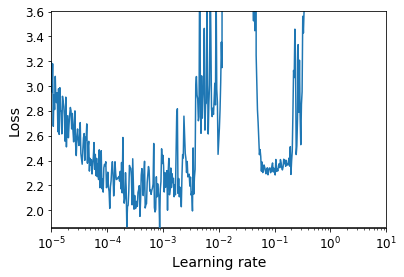

In [219]:
batch_size = 28*28//8
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)
plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 1.4])

##### 2. Use the half of optimal rate found above to re-train using 1cycle scedular

In [206]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None, last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1  # for lr to drop several orders of magnitude
        self.half_iteration = (iterations - self.last_iterations) // 2  # mid-way point for lr to start dropping
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return (rate2 - rate1) * (self.iteration - iter1) / (iter2 - iter1) + rate1
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [215]:
keras.backend.clear_session()
tf.random.set_seed(0)
np.random.seed(0)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.SGD(lr=5e-2)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [216]:
n_epochs = 15
onecycle = OneCycleScheduler(len(X_train) // batch_size * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[onecycle])

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
45000/45000 [==============================] - 9s 199us/sample - loss: 2.0475 - accuracy: 0.2867 - val_loss: 1.9023 - val_accuracy: 0.3450
Epoch 2/15
45000/45000 [==============================] - 7s 150us/sample - loss: 1.7511 - accuracy: 0.3804 - val_loss: 1.8297 - val_accuracy: 0.3482
Epoch 3/15
45000/45000 [==============================] - 7s 160us/sample - loss: 1.6239 - accuracy: 0.4239 - val_loss: 1.8932 - val_accuracy: 0.3606
Epoch 4/15
45000/45000 [==============================] - 8s 173us/sample - loss: 1.5575 - accuracy: 0.4460 - val_loss: 1.7927 - val_accuracy: 0.3914
Epoch 5/15
45000/45000 [==============================] - 7s 166us/sample - loss: 1.5042 - accuracy: 0.4648 - val_loss: 1.8493 - val_accuracy: 0.3708
Epoch 6/15
45000/45000 [==============================] - 7s 157us/sample - loss: 1.4684 - accuracy: 0.4798 - val_loss: 1.7864 - val_accuracy: 0.3956
Epoch 7/15
45000/45000 [===========================

In [217]:
model.evaluate(X_test_scaled, y_test)

10000/10000 [==============================] - 2s 158us/sample - loss: 1.5963 - accuracy: 0.5195


[1.5962877784729004, 0.5195]

##### Conclusion: much faster, even better then normalization, needs to investigate the learning rate of previous models